# Easy example ECG preprocesing

## Physiological Signal Processing

### Authors

### Óscar Barquero Pérez (<oscar.barquero@urjc.es>) y Rebeca Goya Esteban (<rebeca.goyaesteban@urjc.es>)

### Update Feb 2020

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This wokr is under <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

In [17]:
%matplotlib inline
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc

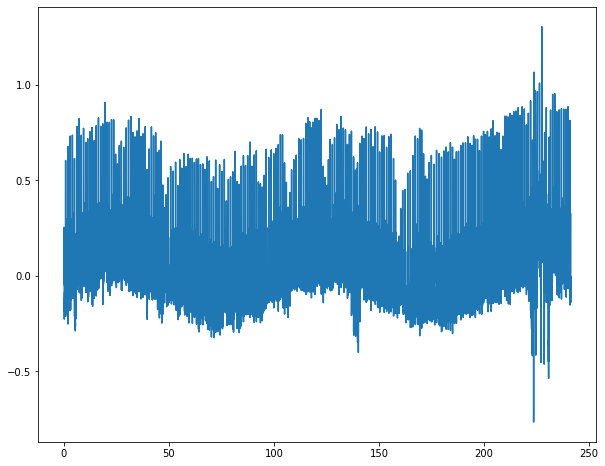

In [2]:
#Read ECG signal

ecg = np.load('ecg.npy')

fs = 1e3 #sampling freq

#plot signal

t = np.arange(len(ecg))/fs

plt.figure(figsize = (10,8))
plt.plot(t,ecg)

(0, 1)

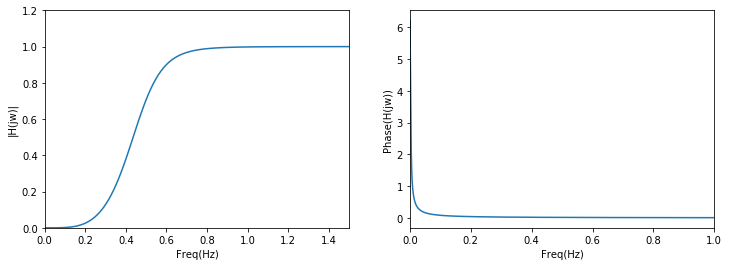

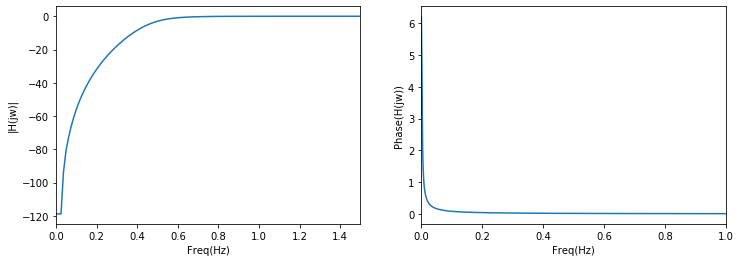

In [3]:
#baseline wander filtering using low-pass filter
fn = 1000/2
f_cut = 0.5/fn#in Hz
b, a = sc.butter(4, f_cut, 'highpass') 

w, h = sc.freqz(b,a, worN =2056*20)

#plot

plt.figure(figsize = (12,4))
plt.subplot(121)

plt.plot(w/np.pi*(1000/2),(np.abs(h)))
plt.xlabel('Freq(Hz)')
plt.ylabel('|H(jw)|')
plt.xlim(0,1.5)

plt.ylim(0,1.2)

plt.subplot(122)
plt.plot(w,np.unwrap(np.angle(h)))
plt.xlabel('Freq(Hz)')
plt.ylabel('Phase(H(jw))')
plt.xlim(0,1)



plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(w/np.pi*(1000/2),20*np.log10((np.abs(h))))
#plt.plot(w_sos,20*np.log10(np.maximum(np.abs(h_sos), 1e-5)))
plt.xlabel('Freq(Hz)')
plt.ylabel('|H(jw)|')
plt.xlim(0,1.5)


plt.subplot(122)
plt.plot(w,np.unwrap(np.angle(h)))
plt.xlabel('Freq(Hz)')
plt.ylabel('Phase(H(jw))')
plt.xlim(0,1)


/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


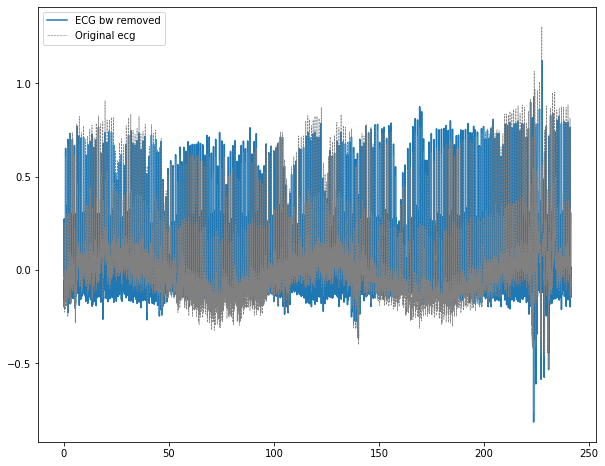

In [4]:
#remove

ecg_blw = sc.filtfilt(b,a,ecg)

plt.figure(figsize = (10,8))
plt.plot(t,ecg_blw,label = 'ECG bw removed')
plt.plot(t,ecg,label = 'Original ecg',linestyle = '--',color = [0.5,0.5,0.5],linewidth = 0.6)
plt.legend()

/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


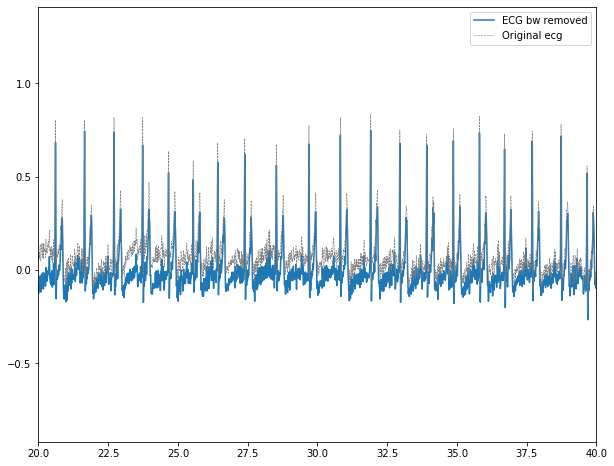

In [5]:
plt.figure(figsize = (10,8))
plt.plot(t,ecg_blw,label = 'ECG bw removed')
plt.plot(t,ecg,label = 'Original ecg',linestyle = '--',color = [0.5,0.5,0.5],linewidth = 0.6)

plt.xlim(20,40)
plt.legend()

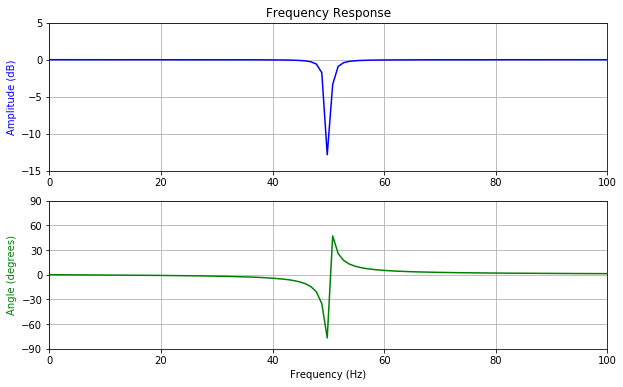

In [6]:
#Power line interference removal

fs = 1e3  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = sc.iirnotch(f0, Q, fs)

 # Frequency response
freq, h = sc.freqz(b, a, fs=fs)
 # Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-15, 5])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()

/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/obarquero/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


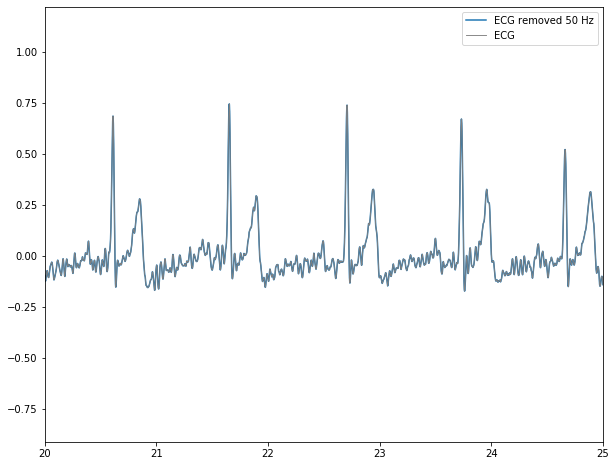

In [7]:
#filtering
ecg_notch = sc.filtfilt(b,a,ecg_blw)


plt.figure(figsize = (10,8))
plt.plot(t,ecg_notch,label = 'ECG removed 50 Hz')
plt.plot(t,ecg_blw,label = 'ECG',color = [0.5,0.5,0.5],linewidth = 0.9)

plt.xlim(20,25)
plt.legend()

A pan-tompkins inspired qrs detector:
 * Band-pass filter between 5-15Hz
 * derivative filter
 * squaring function
 * running mean filter

(0, 2)

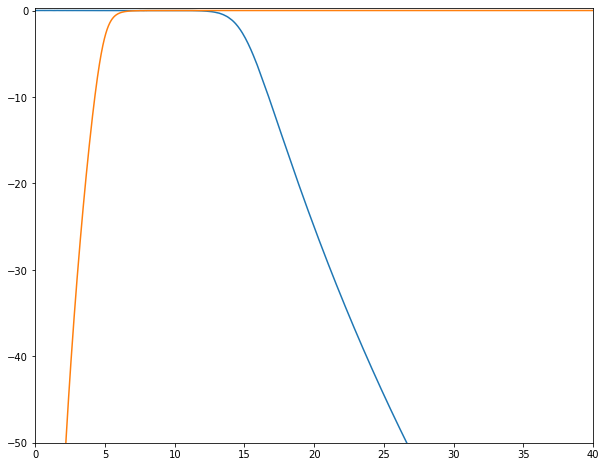

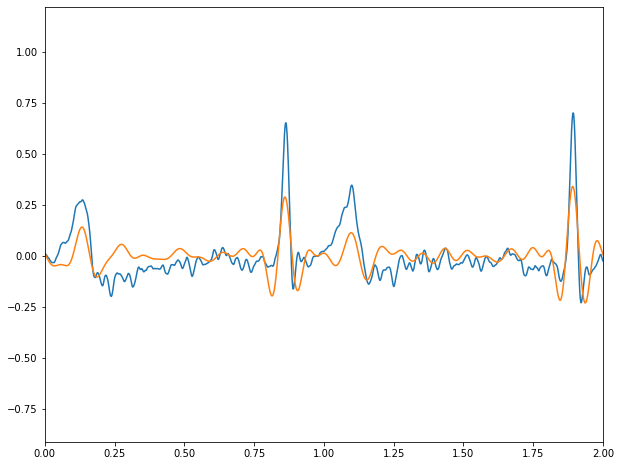

In [8]:
#band_pass filtering
fn=fs/2
f_c_l = 5/fn
f_c_h = 15/fn
b,a = sc.butter(10,f_c_h,'lowpass')
b_h,a_h = sc.butter(7,f_c_l,'highpass')

w, h = sc.freqz(b,a, worN =2056*20,fs = fs)
w, h_h = sc.freqz(b_h,a_h, worN =2056*20,fs = fs)

plt.figure(figsize = (10,8))
plt.plot(w,20*np.log10(np.abs(h)))
plt.plot(w,20*np.log10(np.abs(h_h)))
plt.xlim(0,40)
plt.ylim(-50,0.3)


ecg_bp = sc.filtfilt(b,a,ecg_notch)
ecg_bp = sc.filtfilt(b_h,a_h,ecg_bp)

plt.figure(figsize = (10,8))
plt.plot(t,ecg_notch)
plt.plot(t,ecg_bp)
plt.xlim(0,2)

[-1.08420217e-19  9.27564510e-06  1.14154766e-05 ...  3.88428597e-05
  2.29559400e-05  0.00000000e+00]


/Users/obarquero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


(0, 2)

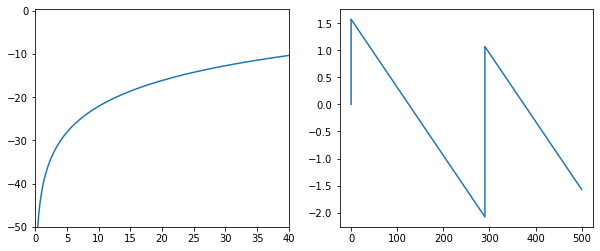

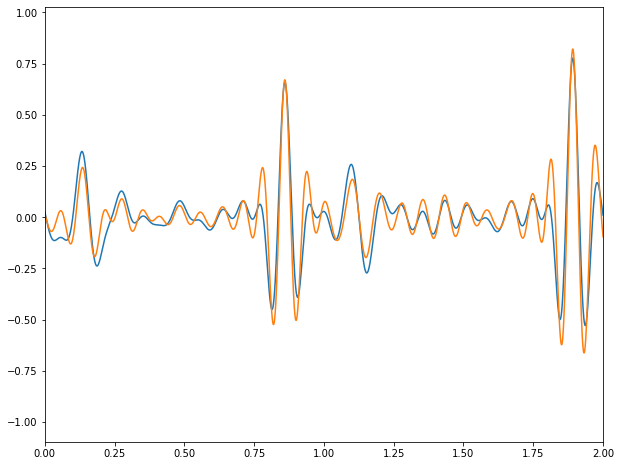

In [9]:
#derivative filter

a = 1
b = 1/8*np.array([2,1,0,-1,-2])
w, h = sc.freqz(b,a, worN =2056*20,fs = fs)

plt.figure(figsize = (10,4))
plt.subplot(121)
plt.plot(w,20*np.log10(np.abs(h)))
plt.xlim(0,40)
plt.ylim(-50,0.3)
plt.subplot(122)
plt.plot(w,np.unwrap(np.angle(h)))



ecg_der = sc.filtfilt(b,a,ecg_bp)
print(ecg_der)
plt.figure(figsize = (10,8))
plt.plot(t,ecg_bp/np.max(np.abs(ecg_bp)))
plt.plot(t,ecg_der/np.max(np.abs(ecg_der)))
plt.xlim(0,2)


(0, 2)

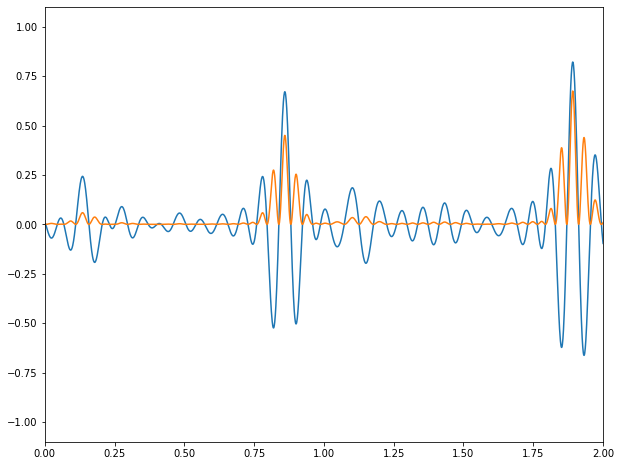

In [10]:
# Squaring function

ecg_non = ecg_der**2

plt.figure(figsize = (10,8))
plt.plot(t,ecg_der/np.max(np.abs(ecg_der)))
plt.plot(t,ecg_non/np.max(np.abs(ecg_non)))
plt.xlim(0,2)


(0, 2)

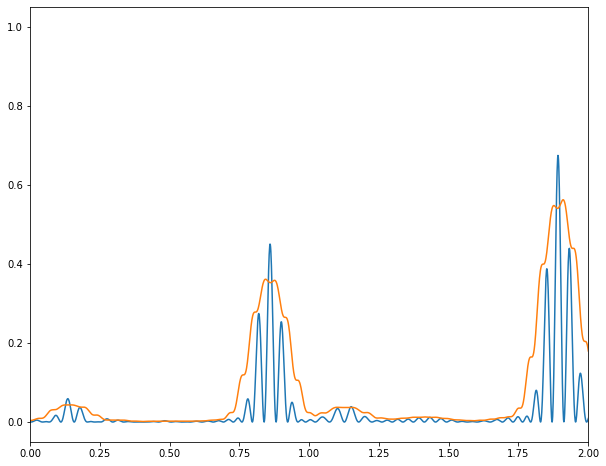

In [11]:
#moving average

#using smoothing from our toolbox
from signal_processing_tools import *

ecg_ma = smooth(ecg_non,window_len = int(150e-3*fs),window = 'flat')

plt.figure(figsize = (10,8))
plt.plot(t,ecg_non/np.max(np.abs(ecg_non)))
plt.plot(t,ecg_ma/np.max(np.abs(ecg_ma)))
plt.xlim(0,2)

Text(0.5, 1.0, 'ECG Running mean')

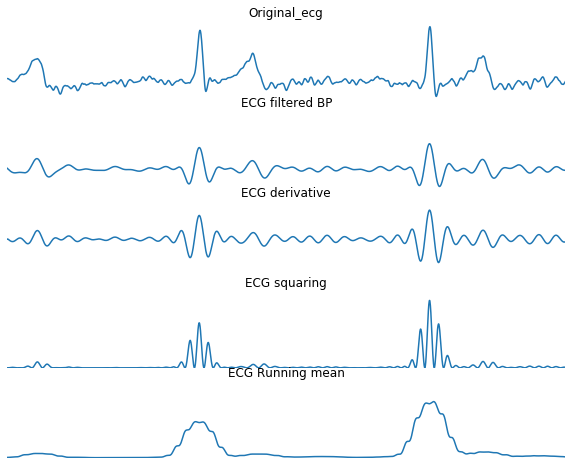

In [12]:
plt.figure(figsize=(10,8))

plt.subplot(511)

plt.plot(t,ecg_notch)
plt.xlim(0,2.5)
plt.ylim(-0.25,0.75)
plt.axis('off')
plt.title('Original_ecg')

plt.subplot(512)
plt.plot(t,ecg_bp)
plt.xlim(0,2.5)
plt.ylim(-0.25,0.75)
plt.axis('off')
plt.title('ECG filtered BP')

plt.subplot(513)
plt.plot(t,ecg_der/np.max(ecg_der))
plt.xlim(0,2.5)
plt.axis('off')
plt.title('ECG derivative')

plt.subplot(514)
plt.plot(t,ecg_non/np.max(ecg_non))
plt.xlim(0,2.5)
plt.ylim(0,0.75)
plt.axis('off')
plt.title('ECG squaring')

plt.subplot(515)
plt.plot(t,ecg_ma/np.max(ecg_ma))
plt.xlim(0,2.5)
plt.ylim(0,0.75)
plt.axis('off')
plt.title('ECG Running mean')

In [30]:
#detection using pan-tompkins algorithm threshold

from signal_processing_tools import *

In [63]:
#detecting r_peaks

beat,th,qrs_index = exp_beat_detection(ecg_ma,int(fs),Tr = .200,a = 0.8,b=0.999)

r_peak,rr = r_peak_detection(ecg_ma,ecg,int(fs),beat,th,qrs_index,Tr = .200)


(0, 20)

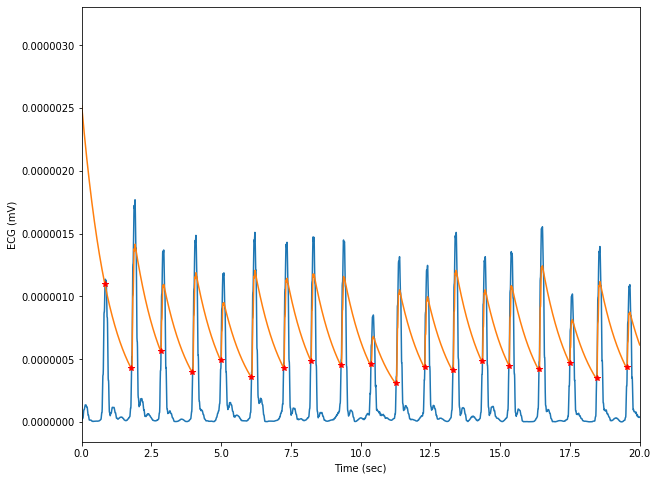

In [64]:
plt.figure(figsize=(10,8))
plt.plot(t,ecg_ma)
plt.plot(t,th)
plt.plot(t[qrs_index],ecg_ma[qrs_index],'r*')
plt.xlabel('Time (sec)')
plt.ylabel('ECG (mV)')
plt.xlim(0,20)

(0, 100000)

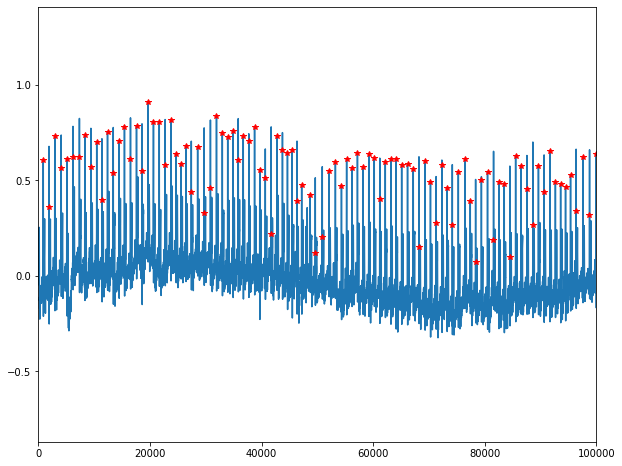

In [65]:


plt.figure(figsize = (10,8))

plt.plot(ecg)
plt.plot(r_peak,ecg[r_peak],'r*')
plt.xlim(0,100000)